In [3]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from skimage.segmentation import find_boundaries
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
import napari

In [7]:
nuclei = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2/20190401_E2_DAPI_CardiacRegion_0.5.nii.gz"


In [8]:
CR_NUCLEI = nib.load(nuclei).get_fdata()
CR_NUCLEI = CR_NUCLEI[:, :, :, 0]
CR_NUCLEI.shape 

(881, 900, 480)

In [20]:
maxis = [CR_NUCLEI[:,:,i].max()-CR_NUCLEI[:,:,i].min() for i in range(CR_NUCLEI.shape[2])]

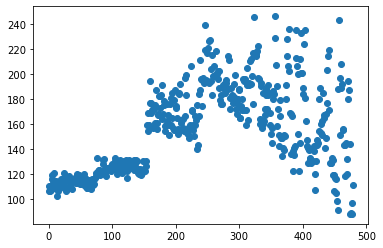

In [21]:
plt.scatter(range(CR_NUCLEI.shape[2]), maxis)

In [27]:
nuclei = np.swapaxes(CR_NUCLEI, 0, 2)

In [28]:
nuclei = np.swapaxes(CR_NUCLEI, 0, 2)
equalized = exposure.equalize_hist(nuclei)

In [22]:
maxis2 = [equalized[:,:,i].max()-equalized[:,:,i].min() for i in range(CR_NUCLEI.shape[2])]
plt.scatter(range(CR_NUCLEI.shape[2]), maxis2)

In [29]:
vmin, vmax = np.quantile(nuclei, q=(0.005, 0.995))

stretched = exposure.rescale_intensity(
    nuclei, 
    in_range=(vmin, vmax), 
    out_range=np.float32
)

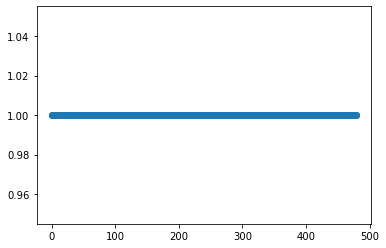

In [25]:
maxis3 = [stretched[:,:,i].max()-stretched[:,:,i].min() for i in range(CR_NUCLEI.shape[2])]
plt.scatter(range(CR_NUCLEI.shape[2]), maxis3)

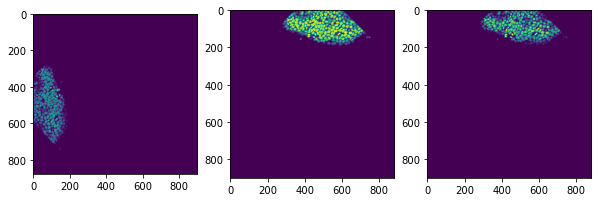

In [31]:
for t in range(48):
    plt.figure(figsize=(10,10)) 
    n = 10*t
    plots = [CR_NUCLEI[:, :, n], equalized[n,:,:], stretched[n,:,:]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

In [32]:
equalized.shape

(480, 900, 881)

In [33]:
FILE = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2/20190401_E2_DAPI_CardiacRegion_0.5_equalized_XYZ.nii.gz"
ni_img = nib.Nifti1Image(np.swapaxes(equalized, 0, 2).astype('float32'), affine=np.eye(4))
nib.save(ni_img, FILE)

In [34]:
FILE = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2/20190401_E2_DAPI_CardiacRegion_0.5_stretched_XYZ.nii.gz"
ni_img = nib.Nifti1Image(np.swapaxes(equalized, 0, 2).astype('float32'), affine=np.eye(4))
nib.save(ni_img, FILE)

### INSPECT

In [1]:
eq = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/results/20190401_E2_DAPI_CardiacRegion_0.5_equalized_MASK_ZXY.nii.gz"
st = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/results/20190401_E2_DAPI_CardiacRegion_0.5_stretched_MASK_ZXY.nii.gz"

In [4]:
pred_eq = nib.load(eq).get_fdata()
pred_eq.shape

(480, 881, 900)

In [5]:
pred_st = nib.load(st).get_fdata()
pred_st.shape

(480, 881, 900)

In [14]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 350 #10*t
    plots = [CR_NUCLEI[:, :, n], find_boundaries(pred_eq[n,:,:]), find_boundaries(pred_st[n,:,:])]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break